# Feature Selection

The purpose of this notebook will be to use various machine learning feature importance algorithms to determine which features will best predict the winner of NCAA matches

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_NCAA = pd.read_csv('../data/data-full-good.csv')
df_NCAA.head()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
0,26.3,5,2.9,1,131.0,52.4,11,0.413,52,0.365,...,21,0.900,9,"Moody Coliseum , Abilene, Texas",Schreiner\n\t\t\t,Schreiner\n\t\t\t,71.0,Home,ABILENE-CHRISTIAN,Abilene Christian
1,26.7,4,6.1,3,120.5,45.0,18,0.318,55,0.273,...,27,0.846,11,"Moody Coliseum , Abilene, Texas",McMurry\n\t\t\t,McMurry\n\t\t\t,73.2,Home,ABILENE-CHRISTIAN,Abilene Christian
2,27.3,6,5.9,2,120.3,87.5,21,0.522,45,0.489,...,20,0.889,8,"Moody Coliseum , Abilene, Texas",CAMPBELL,Campbell,69.3,Home,ABILENE-CHRISTIAN,Abilene Christian
3,27.3,6,10.3,3,110.8,71.0,22,0.439,57,0.386,...,16,0.800,24,"Moody Coliseum , Abilene, Texas",STEPHEN-F-AUSTIN,Stephen F. Austin,65.1,Home,ABILENE-CHRISTIAN,Abilene Christian
4,27.8,5,0.0,0,142.7,50.0,13,0.418,49,0.367,...,30,1.000,1,"Moody Coliseum , Abilene, Texas",Arlington Baptist\n\t\t\t,Arlington Baptist\n\t\t\t,74.8,Home,ABILENE-CHRISTIAN,Abilene Christian


# Feature Engineering

In [74]:
df_NCAA = df_NCAA.drop(['winning_name', 'winning_abbr', 'losing_name', 'losing_abbr', 'location'], axis=1)

In [75]:
df_NCAA.head()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,pace,winner
0,26.3,5,2.9,1,131.0,52.4,11,0.413,52,0.365,...,0.700,20.6,17,34,0.618,21,0.900,9,71.0,Home
1,26.7,4,6.1,3,120.5,45.0,18,0.318,55,0.273,...,0.539,14.7,14,49,0.551,27,0.846,11,73.2,Home
2,27.3,6,5.9,2,120.3,87.5,21,0.522,45,0.489,...,0.688,14.4,10,34,0.588,20,0.889,8,69.3,Home
3,27.3,6,10.3,3,110.8,71.0,22,0.439,57,0.386,...,0.546,10.9,8,29,0.552,16,0.800,24,65.1,Home
4,27.8,5,0.0,0,142.7,50.0,13,0.418,49,0.367,...,0.704,12.8,11,43,0.698,30,1.000,1,74.8,Home


In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df_NCAA['winner'])
df_NCAA['winner'] = le.transform(df_NCAA['winner'])
df_NCAA.head()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,pace,winner
0,26.3,5,2.9,1,131.0,52.4,11,0.413,52,0.365,...,0.700,20.6,17,34,0.618,21,0.900,9,71.0,1
1,26.7,4,6.1,3,120.5,45.0,18,0.318,55,0.273,...,0.539,14.7,14,49,0.551,27,0.846,11,73.2,1
2,27.3,6,5.9,2,120.3,87.5,21,0.522,45,0.489,...,0.688,14.4,10,34,0.588,20,0.889,8,69.3,1
3,27.3,6,10.3,3,110.8,71.0,22,0.439,57,0.386,...,0.546,10.9,8,29,0.552,16,0.800,24,65.1,1
4,27.8,5,0.0,0,142.7,50.0,13,0.418,49,0.367,...,0.704,12.8,11,43,0.698,30,1.000,1,74.8,1


# Feature Importance using Extra Tree Classifier

Now that our data has been cleaned, we will run two feature importance classifiers. The first we will use is the Extra Tree Classifier and the second is RFE using the logistic regression algorithm

/Users/Vivek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Model Feature Importance: [0.00402648 0.01392947 0.0047369  0.0033817  0.05742001 0.00463656
 0.01305487 0.01850972 0.00304604 0.04605627 0.01642505 0.0064699
 0.00644917 0.00450788 0.01299098 0.00594048 0.00333899 0.09230988
 0.00409569 0.00342442 0.00684868 0.04892005 0.00393462 0.0040023
 0.00364481 0.00353208 0.008098   0.004162   0.01953163 0.00704381
 0.02318074 0.00625565 0.00604613 0.00384037 0.01504491 0.00557583
 0.02079144 0.00643467 0.00418384 0.0211543  0.00354252 0.00275788
 0.05932332 0.00432705 0.0065127  0.03580599 0.00409143 0.02807115
 0.01343118 0.00581115 0.00822069 0.00314126 0.01016523 0.011106
 0.04213548 0.00517303 0.00400239 0.00615888 0.05846182 0.00450774
 0.00552483 0.00363678 0.00300808 0.00783581 0.00642096 0.01525516
 0.00444997 0.04095593 0.00676035 0.0081249  0.00404596 0.01560184
 0.01013679 0.00451942]


AttributeError: 'AxesSubplot' object has no attribute 'show'

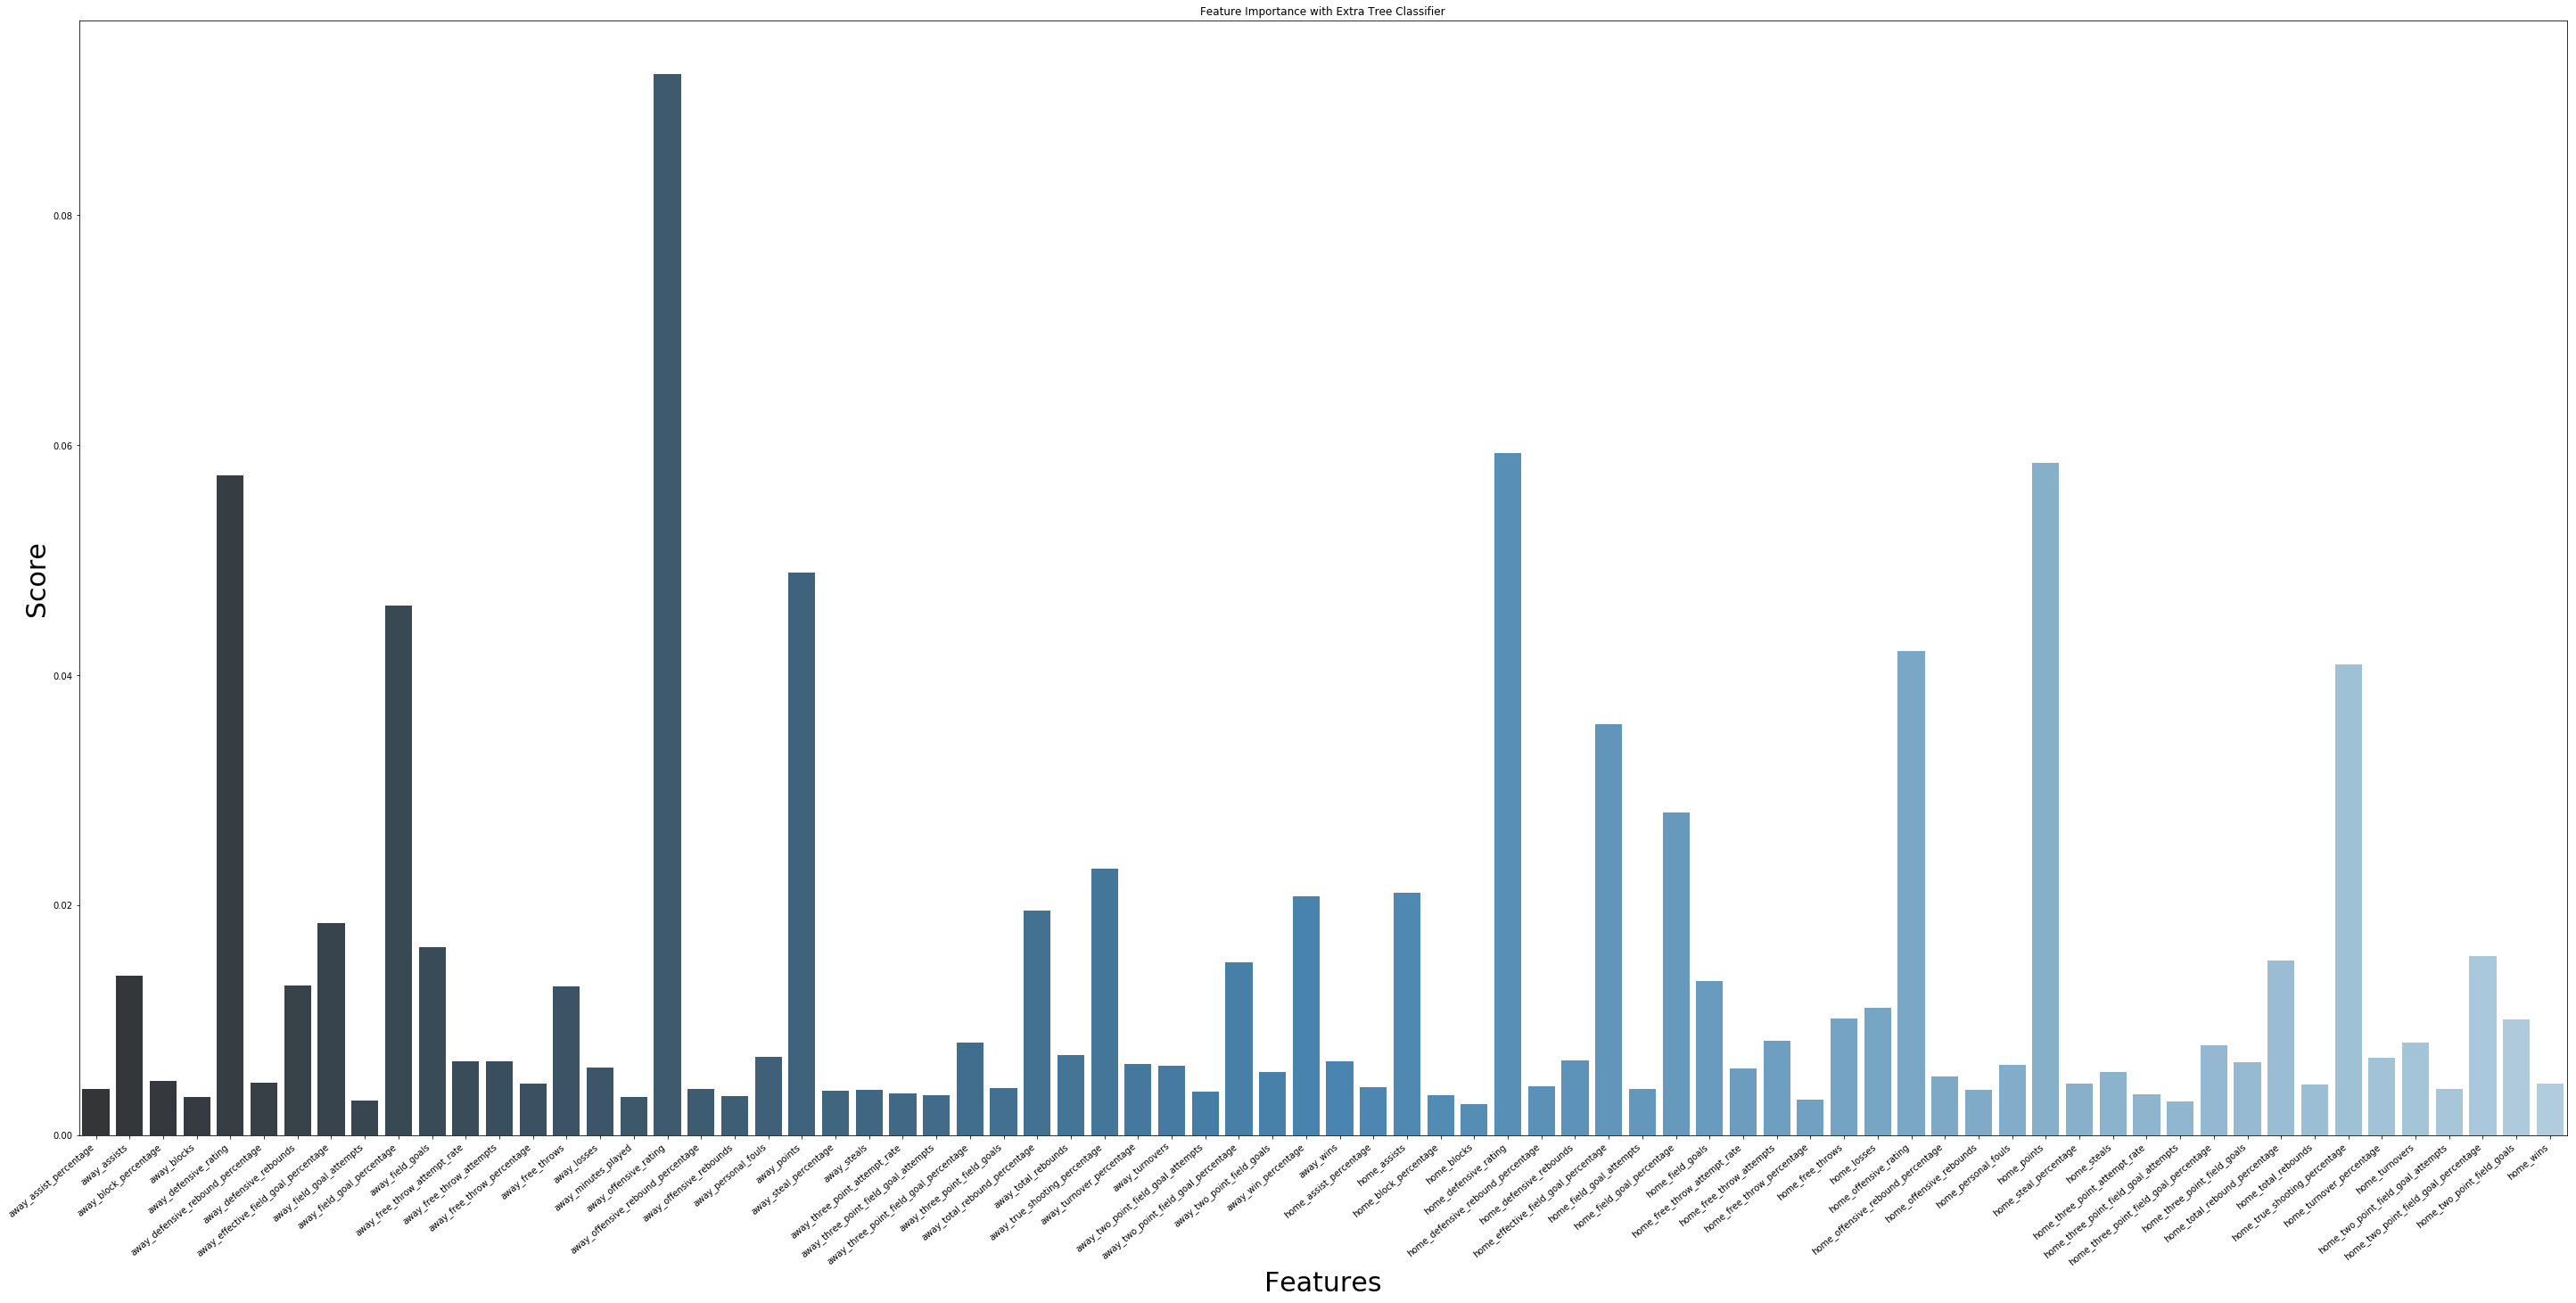

In [77]:
#Feature Importance with Extra Tree Classifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

#Create Feature/Label Dataframes
X = df_NCAA[['away_assist_percentage', 'away_assists', 'away_block_percentage', 'away_blocks', 'away_defensive_rating', 'away_defensive_rebound_percentage', 'away_defensive_rebounds', 'away_effective_field_goal_percentage', 'away_field_goal_attempts', 'away_field_goal_percentage', 'away_field_goals', 'away_free_throw_attempt_rate', 'away_free_throw_attempts', 'away_free_throw_percentage', 'away_free_throws', 'away_losses', 'away_minutes_played', 'away_offensive_rating', 'away_offensive_rebound_percentage', 'away_offensive_rebounds', 'away_personal_fouls', 'away_points', 'away_steal_percentage', 'away_steals', 'away_three_point_attempt_rate', 'away_three_point_field_goal_attempts', 'away_three_point_field_goal_percentage', 'away_three_point_field_goals', 'away_total_rebound_percentage', 'away_total_rebounds', 'away_true_shooting_percentage', 'away_turnover_percentage', 'away_turnovers', 'away_two_point_field_goal_attempts', 'away_two_point_field_goal_percentage', 'away_two_point_field_goals', 'away_win_percentage', 'away_wins', 'home_assist_percentage', 'home_assists', 'home_block_percentage', 'home_blocks', 'home_defensive_rating', 'home_defensive_rebound_percentage', 'home_defensive_rebounds', 'home_effective_field_goal_percentage', 'home_field_goal_attempts', 'home_field_goal_percentage', 'home_field_goals', 'home_free_throw_attempt_rate', 'home_free_throw_attempts', 'home_free_throw_percentage', 'home_free_throws', 'home_losses', 'home_offensive_rating', 'home_offensive_rebound_percentage', 'home_offensive_rebounds', 'home_personal_fouls', 'home_points', 'home_steal_percentage', 'home_steals', 'home_three_point_attempt_rate', 'home_three_point_field_goal_attempts', 'home_three_point_field_goal_percentage', 'home_three_point_field_goals', 'home_total_rebound_percentage', 'home_total_rebounds', 'home_true_shooting_percentage', 'home_turnover_percentage', 'home_turnovers', 'home_two_point_field_goal_attempts', 'home_two_point_field_goal_percentage', 'home_two_point_field_goals', 'home_wins']]
Y = df_NCAA[['winner']]
X = np.array(X)
Y = np.array(Y) 

#Feature Extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print("Model Feature Importance:", model.feature_importances_)
type(model.feature_importances_)

import seaborn as sns

%matplotlib inline
plt.figure(figsize=(50,23))
plt.title('Feature Importance with Extra Tree Classifier')
plt.xlabel('Features', fontsize = '30')
plt.ylabel('Score', fontsize = '30')
ETCFeatures = ['away_assist_percentage', 'away_assists', 'away_block_percentage', 'away_blocks', 'away_defensive_rating', 'away_defensive_rebound_percentage', 'away_defensive_rebounds', 'away_effective_field_goal_percentage', 'away_field_goal_attempts', 'away_field_goal_percentage', 'away_field_goals', 'away_free_throw_attempt_rate', 'away_free_throw_attempts', 'away_free_throw_percentage', 'away_free_throws', 'away_losses', 'away_minutes_played', 'away_offensive_rating', 'away_offensive_rebound_percentage', 'away_offensive_rebounds', 'away_personal_fouls', 'away_points', 'away_steal_percentage', 'away_steals', 'away_three_point_attempt_rate', 'away_three_point_field_goal_attempts', 'away_three_point_field_goal_percentage', 'away_three_point_field_goals', 'away_total_rebound_percentage', 'away_total_rebounds', 'away_true_shooting_percentage', 'away_turnover_percentage', 'away_turnovers', 'away_two_point_field_goal_attempts', 'away_two_point_field_goal_percentage', 'away_two_point_field_goals', 'away_win_percentage', 'away_wins', 'home_assist_percentage', 'home_assists', 'home_block_percentage', 'home_blocks', 'home_defensive_rating', 'home_defensive_rebound_percentage', 'home_defensive_rebounds', 'home_effective_field_goal_percentage', 'home_field_goal_attempts', 'home_field_goal_percentage', 'home_field_goals', 'home_free_throw_attempt_rate', 'home_free_throw_attempts', 'home_free_throw_percentage', 'home_free_throws', 'home_losses', 'home_offensive_rating', 'home_offensive_rebound_percentage', 'home_offensive_rebounds', 'home_personal_fouls', 'home_points', 'home_steal_percentage', 'home_steals', 'home_three_point_attempt_rate', 'home_three_point_field_goal_attempts', 'home_three_point_field_goal_percentage', 'home_three_point_field_goals', 'home_total_rebound_percentage', 'home_total_rebounds', 'home_true_shooting_percentage', 'home_turnover_percentage', 'home_turnovers', 'home_two_point_field_goal_attempts', 'home_two_point_field_goal_percentage', 'home_two_point_field_goals', 'home_wins']

bplt = sns.barplot(ETCFeatures, model.feature_importances_, palette='Blues_d')
bplt.set_xticklabels(bplt.get_xticklabels(), rotation = 40, ha="right")
bplt.show()

In [78]:
type(model.feature_importances_)

numpy.ndarray

In [79]:
scores = model.feature_importances_.tolist()
scores_for_feature = dict((zip(ETCFeatures, scores)))
for key, value in scores_for_feature.items():
    print(key,":",value)

away_assist_percentage : 0.004026477442514187
away_assists : 0.013929468877306181
away_block_percentage : 0.004736899897694395
away_blocks : 0.003381697637719645
away_defensive_rating : 0.05742001324427959
away_defensive_rebound_percentage : 0.004636558971647173
away_defensive_rebounds : 0.013054869205613403
away_effective_field_goal_percentage : 0.01850971747615692
away_field_goal_attempts : 0.003046035967858153
away_field_goal_percentage : 0.046056269535009665
away_field_goals : 0.016425054695427148
away_free_throw_attempt_rate : 0.006469904469408859
away_free_throw_attempts : 0.006449173171413062
away_free_throw_percentage : 0.0045078824479770335
away_free_throws : 0.012990977138024353
away_losses : 0.005940484421359122
away_minutes_played : 0.003338986464286298
away_offensive_rating : 0.09230987503996696
away_offensive_rebound_percentage : 0.004095693247443307
away_offensive_rebounds : 0.0034244233521275084
away_personal_fouls : 0.006848678572650308
away_points : 0.0489200461427440

We are given an importance score for each attribute. The larger score the more important the attribute. Based on the Extra Tree Classifier, the rankings for high scoring features as well as there score are listed above. There is a lot here, so looking at the graph, it seems like the best predictors have a value of > .02

I am going to select the features with these scores to identify which ones they are

In [80]:
scores = model.feature_importances_.tolist()
scores_for_feature = dict((zip(ETCFeatures, scores)))
for key, value in scores_for_feature.items():
    if value >= .02:
        print(key,":",value)

away_defensive_rating : 0.05742001324427959
away_field_goal_percentage : 0.046056269535009665
away_offensive_rating : 0.09230987503996696
away_points : 0.048920046142744006
away_true_shooting_percentage : 0.023180743244315412
away_win_percentage : 0.020791437835456446
home_assists : 0.021154302262575326
home_defensive_rating : 0.05932331947693088
home_effective_field_goal_percentage : 0.03580598715369772
home_field_goal_percentage : 0.028071152636574632
home_offensive_rating : 0.04213548448604708
home_points : 0.05846181776402885
home_true_shooting_percentage : 0.040955928979331216


Our Extra Tree Classifier indicates that offensive rating is the most important predictor of winning an NCAA game, followed by defensive rating. 

Next I will use another feature importance classifier to verify these results. Using a RFE (recursive feature elimination). RFE recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). The benefit of using rfe is that through the recursive process, we can get a ranking of attributes that fare well.

# RFE (Recursive Feature Elimination)

In [81]:
#Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Feature Extraction using RFE with the logistic Regression Algorithm
model = LogisticRegression()
rfe = RFE(model, 1)
rfe = rfe.fit(X, Y)


print("RFE n_Features:", rfe.n_features_)
print("RFE support:", rfe.support_)
print("RFE ranking: ", rfe.ranking_)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE n_Features: 1
RFE support: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
RFE ranking:  [36 35 38 15  4 26 42 57 49 62  7 72 29 63  9 19 50  3 24 23 22  5 44 43
 74 33 45  8 39 25 56 48 16 61 70 21 34 14 32 31 46 17  1 51 66 58 41 60
 11 68 18 64 12 20  2 28 59 30  6 71 37 73 53 54 10 40 67 55 52 27 65 69
 47 13]


There are so many features it is hard to gauge which feature has which ranking. I am going to programatically combine the features array with the ranking to get a clean output on the rankings.

In [82]:
type(rfe.ranking_)

numpy.ndarray

In [83]:
print(X)

[[26.3    5.     2.9   ...  0.618 21.     9.   ]
 [26.7    4.     6.1   ...  0.551 27.    11.   ]
 [27.3    6.     5.9   ...  0.588 20.     8.   ]
 ...
 [60.7   17.     8.8   ...  0.676 23.    10.   ]
 [64.5   20.     7.3   ...  0.537 22.    10.   ]
 [69.    20.    16.1   ...  0.387 12.     6.   ]]


In [84]:
print(ETCFeatures)

['away_assist_percentage', 'away_assists', 'away_block_percentage', 'away_blocks', 'away_defensive_rating', 'away_defensive_rebound_percentage', 'away_defensive_rebounds', 'away_effective_field_goal_percentage', 'away_field_goal_attempts', 'away_field_goal_percentage', 'away_field_goals', 'away_free_throw_attempt_rate', 'away_free_throw_attempts', 'away_free_throw_percentage', 'away_free_throws', 'away_losses', 'away_minutes_played', 'away_offensive_rating', 'away_offensive_rebound_percentage', 'away_offensive_rebounds', 'away_personal_fouls', 'away_points', 'away_steal_percentage', 'away_steals', 'away_three_point_attempt_rate', 'away_three_point_field_goal_attempts', 'away_three_point_field_goal_percentage', 'away_three_point_field_goals', 'away_total_rebound_percentage', 'away_total_rebounds', 'away_true_shooting_percentage', 'away_turnover_percentage', 'away_turnovers', 'away_two_point_field_goal_attempts', 'away_two_point_field_goal_percentage', 'away_two_point_field_goals', 'away

In [85]:
ranks = rfe.ranking_.tolist()

In [86]:
print(ranks)

[36, 35, 38, 15, 4, 26, 42, 57, 49, 62, 7, 72, 29, 63, 9, 19, 50, 3, 24, 23, 22, 5, 44, 43, 74, 33, 45, 8, 39, 25, 56, 48, 16, 61, 70, 21, 34, 14, 32, 31, 46, 17, 1, 51, 66, 58, 41, 60, 11, 68, 18, 64, 12, 20, 2, 28, 59, 30, 6, 71, 37, 73, 53, 54, 10, 40, 67, 55, 52, 27, 65, 69, 47, 13]


In [87]:
print(len(ranks), len(ETCFeatures))

74 74


In [88]:
ranks_for_feature = dict((zip(ETCFeatures, ranks)))

In [89]:
for key, value in ranks_for_feature.items():
    print(key,":",value)
    

away_assist_percentage : 36
away_assists : 35
away_block_percentage : 38
away_blocks : 15
away_defensive_rating : 4
away_defensive_rebound_percentage : 26
away_defensive_rebounds : 42
away_effective_field_goal_percentage : 57
away_field_goal_attempts : 49
away_field_goal_percentage : 62
away_field_goals : 7
away_free_throw_attempt_rate : 72
away_free_throw_attempts : 29
away_free_throw_percentage : 63
away_free_throws : 9
away_losses : 19
away_minutes_played : 50
away_offensive_rating : 3
away_offensive_rebound_percentage : 24
away_offensive_rebounds : 23
away_personal_fouls : 22
away_points : 5
away_steal_percentage : 44
away_steals : 43
away_three_point_attempt_rate : 74
away_three_point_field_goal_attempts : 33
away_three_point_field_goal_percentage : 45
away_three_point_field_goals : 8
away_total_rebound_percentage : 39
away_total_rebounds : 25
away_true_shooting_percentage : 56
away_turnover_percentage : 48
away_turnovers : 16
away_two_point_field_goal_attempts : 61
away_two_point

There are so many feature it is hard to guage which features are the best. As we saw from the Extra Tree Classifier there were about 14 features clearly better than the rest. Because of that I want to see the top 14 using RFE

In [91]:
for key, value in ranks_for_feature.items():
    if value <= 14:
        print(key,":",value)

away_defensive_rating : 4
away_field_goals : 7
away_free_throws : 9
away_offensive_rating : 3
away_points : 5
away_three_point_field_goals : 8
away_wins : 14
home_defensive_rating : 1
home_field_goals : 11
home_free_throws : 12
home_offensive_rating : 2
home_points : 6
home_three_point_field_goals : 10
home_wins : 13


In [92]:
for key, value in ranks_for_feature.items():
    if value <= 20:
        print(key,":",value)

away_blocks : 15
away_defensive_rating : 4
away_field_goals : 7
away_free_throws : 9
away_losses : 19
away_offensive_rating : 3
away_points : 5
away_three_point_field_goals : 8
away_turnovers : 16
away_wins : 14
home_blocks : 17
home_defensive_rating : 1
home_field_goals : 11
home_free_throw_attempts : 18
home_free_throws : 12
home_losses : 20
home_offensive_rating : 2
home_points : 6
home_three_point_field_goals : 10
home_wins : 13
